In [1]:
import rdkit
import glob
from rdkit import Chem
from rdkit.Chem.rdchem import BondType as BT
from rdkit.Chem import AllChem, GetPeriodicTable, RemoveHs
from rdkit.Chem import Descriptors
import os
import matplotlib.pyplot as plt

In [4]:
#Copied from https://github.com/gcorso/DiffDock/blob/main/datasets/process_mols.py
def read_molecule(molecule_file, sanitize=False, calc_charges=False, remove_hs=False):
    if molecule_file.endswith('.mol2'):
        mol = Chem.MolFromMol2File(molecule_file, sanitize=False, removeHs=False)
    elif molecule_file.endswith('.sdf'):
        supplier = Chem.SDMolSupplier(molecule_file, sanitize=False, removeHs=False)
        mol = supplier[0]
    elif molecule_file.endswith('.pdbqt'):
        with open(molecule_file) as file:
            pdbqt_data = file.readlines()
        pdb_block = ''
        for line in pdbqt_data:
            pdb_block += '{}\n'.format(line[:66])
        mol = Chem.MolFromPDBBlock(pdb_block, sanitize=False, removeHs=False)
    elif molecule_file.endswith('.pdb'):
        mol = Chem.MolFromPDBFile(molecule_file, sanitize=False, removeHs=False)
    else:
        raise ValueError('Expect the format of the molecule_file to be '
                         'one of .mol2, .sdf, .pdbqt and .pdb, got {}'.format(molecule_file))

    try:
        if sanitize or calc_charges:
            Chem.SanitizeMol(mol)

        if calc_charges:
            # Compute Gasteiger charges on the molecule.
            try:
                AllChem.ComputeGasteigerCharges(mol)
            except:
                warnings.warn('Unable to compute charges for the molecule.')

        if remove_hs:
            mol = Chem.RemoveHs(mol, sanitize=sanitize)
    except Exception as e:
        print(e)
        print("RDKit was unable to read the molecule.")
        return None

    return mol

In [5]:
in_dir = "/Users/dsharon/Documents/MIT/6.8701/Project/Data/test_HarmonicFlow_timesplit_DistPock_rdkit_110epoch_save_inference_20231211_183902_2023-12-11_18-39-10/inference_output/"
out_dir = "/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220"
#Run conversion

for pdbdir in glob.glob(f"{in_dir}/*"):
    #print(pdbdir)
    pdb_name = pdbdir.split("/")[-1]
    #print(pdb_name)
    pdb_fi = open(f"{pdbdir}/{pdb_name}_pred_0globalStep_xt.pdb", "r")
    endmdl_count = 0
    last_file = open(f"{out_dir}/{pdb_name}_x20.pdb", "w")
    for l in pdb_fi:
        if endmdl_count == 19:
            last_file.write(l)
        if l.rstrip() == "ENDMDL":
            endmdl_count += 1
    print(endmdl_count)
    last_file.close()

path_poses = f"{out_dir}/*"
path_pdb_bind = "/Users/dsharon/Documents/MIT/6.8701/Project/Code/HarmonicFlow/FlowSite/data/PDBBind_processed/"
print(path_poses)
pdb_files_rg = glob.glob(path_poses)
rg_diff = []
rg_percent_error = []
for pdb_f in pdb_files_rg:
    print(pdb_f)
    pdb_name = pdb_f.split("/")[-1][0:4]

    #pdbbind rg
    #Copied below from https://github.com/gcorso/DiffDock/blob/main/datasets/pdbbind.py
    for file in os.listdir(os.path.join(path_pdb_bind, pdb_name)):
        if file.endswith(".sdf") and 'rdkit' not in file:
            lig = read_molecule(os.path.join(path_pdb_bind, pdb_name, file), remove_hs=False, sanitize=True)
            if lig is None and os.path.exists(os.path.join(path_pdb_bind, pdb_name, file[:-4] + ".mol2")):  # read mol2 file if sdf file cannot be sanitized
                print('Using the .sdf file failed. We found a .mol2 file instead and are trying to use that.')
                lig = read_molecule(os.path.join(path_pdb_bind, pdb_name, file[:-4] + ".mol2"), remove_hs=False, sanitize=True)

    rg_xtal = rdkit.Chem.Descriptors3D.RadiusOfGyration(lig)
    print(pdb_name)

    #ifnerence rg
    l_for_rg = read_molecule(pdb_f, remove_hs=False, sanitize=False)
    rg_of_l = rdkit.Chem.Descriptors3D.RadiusOfGyration(l_for_rg)

    rg_i_minus_p = rg_of_l - rg_xtal
    rg_pe = 100.0 * (rg_i_minus_p / rg_xtal)

    rg_diff.append(rg_i_minus_p)
    rg_percent_error.append(rg_pe)


20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/*
/Users/dsharon/Documents/MIT/6.8701/Project/Data/Fr

[22:35:45] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 19 20 21 22 23
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 1 8 9 10 11 12 13 14
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 18 19 20 21
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 20 21
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 28
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 1 18 19 20
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 103 104 105 106 107 108 109 110 111
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 2 3 5 19 20 21 22 23 25
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 22
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 6 8 9 10 11

6qlq
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6mji_x20.pdb
6mji
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6hhj_x20.pdb
6hhj
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6qre_x20.pdb
Can't kekulize mol.  Unkekulized atoms: 0 1 2 13 14
RDKit was unable to read the molecule.
Using the .sdf file failed. We found a .mol2 file instead and are trying to use that.
6qre
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6e6j_x20.pdb
Can't kekulize mol.  Unkekulized atoms: 1 2 6 29 32
RDKit was unable to read the molecule.
Using the .sdf file failed. We found a .mol2 file instead and are trying to use that.
6e6j
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6r4k_x20.pdb
6r4k
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6qw8_x20.pdb
6qw8
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6g29_x20.pdb
6g

[22:35:45] Can't kekulize mol.  Unkekulized atoms: 3 4 20 21 22
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 23
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17
[22:35:45] Explicit valence for atom # 0 C greater than permitted
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 1 19 20 21
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 1 3 21 22 23 24 25 26 27
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 23
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 5 6 7 9 10 13 18 19
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 12 13 14
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 120 121 122 123 124 125 126 127 128
[22:35:45] Can't kekul

6hop
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6i64_x20.pdb
6i64
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6i74_x20.pdb
6i74
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6hbn_x20.pdb
6hbn
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6mo9_x20.pdb
6mo9
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6pka_x20.pdb
6pka
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6a1c_x20.pdb
6a1c
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6mjq_x20.pdb
6mjq
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6hhr_x20.pdb
6hhr
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/5zcu_x20.pdb
5zcu
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6jse_x20.pdb
6jse
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6

6i66
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6hor_x20.pdb
6hor


[22:35:45] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 28
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 14 15 16
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 14 15 16 17 33
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 113 114 115 116 117
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 1 2 16 17
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 18
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 5 19 20 22 23
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 0 5 6 7 8 14 15 16 22
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[22:35:45] Can't kekulize mol.  Unkekulized atoms: 1 3 18 21 22
[22:35:45] Can't kekulize mol.  Unkekulized atoms

Text(0, 0.5, 'Frequency')

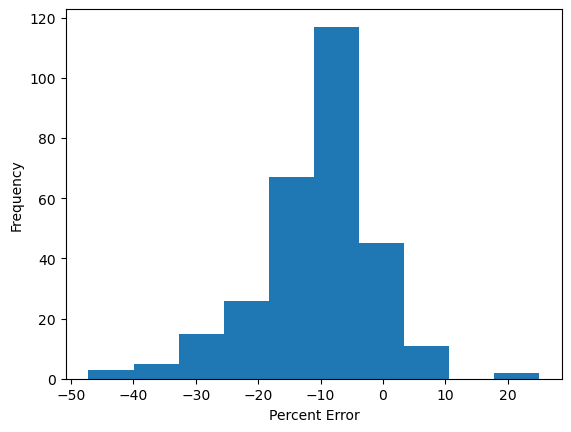

In [7]:
plt.hist(rg_percent_error)
plt.xlabel("Percent Error")
plt.ylabel("Frequency")

In [14]:
rdkit_files_get_last = "/Users/dsharon/Documents/MIT/6.8701/Project/Data/test_HarmonicFlow_timesplit_DistPock_rdkit_110epoch_save_inference_20231211_183902_2023-12-11_18-39-10/inference_output/"
rdkit_save_last = "/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220"
rg_rdkit = get_rg_distrib(rdkit_files_get_last, rdkit_save_last)

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/*
/Users/dsharon/Documents/MIT/6.8701/Project/Data/Fr

In [ ]:
import glob


In [11]:
glob.glob("/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/*")

['/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6qln_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6gdy_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6nd3_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6st3_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6d08_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6gj8_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6qqu_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6eeb_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6i63_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6e3m_x20.pdb',
 '/Users/dsharon/Documents/MIT/6.8701/Project/Data/From_Sam_Last231211_2220/6g3c_x20.pdb',